**Question 1**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as gr
import plotly.express as px

In [9]:
postsData=pd.read_csv('/content/drive/MyDrive/parlerData/parler_postsData.csv')
print(postsData)

       Impressions  ...                           Creator
0             1200  ...  b12df9cacba44ff08837b823ba906f6b
1              585  ...  8290766df6a5425faa789461eb5051d0
2              575  ...  8290766df6a5425faa789461eb5051d0
3              573  ...  8290766df6a5425faa789461eb5051d0
4              783  ...  8290766df6a5425faa789461eb5051d0
...            ...  ...                               ...
101940         209  ...  804e16c75cc74b309cd325f7f8cc96ae
101941        2200  ...  02bc6e6a7cb349c2ac4a7bb9d4bdd12c
101942         119  ...  2dd8e283205346889dab4e884f81c0c5
101943         313  ...  8b3b4ad742024b9a8e878fbdb3402bf3
101944         303  ...  8b3b4ad742024b9a8e878fbdb3402bf3

[101945 rows x 9 columns]


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
userData=pd.read_csv('/content/drive/MyDrive/parlerData/parler_userData.csv')
print(userData)

                     Name   Score  ...  Human Verified
0              Sarah Girl    1200  ...  False    False
1       Millstone-Diaries    3200  ...  False    False
2      Garrett Karls MAGA     325  ...   True    False
3              Proud Boys  544000  ...  False     True
4                  Rudy G  490000  ...  False     True
...                   ...     ...  ...    ...      ...
22321           Parkerjnj     993  ...  False    False
22322                Tess    2900  ...  False    False
22323  Rep. Chris Stewart      17  ...  False    False
22324               Rob K     169  ...  False    False
22325          Morloff175    2200  ...  False    False

[22326 rows x 9 columns]


In [12]:
countUser=postsData.Creator.value_counts()[:10]
countUser=pd.DataFrame(countUser)
countUser

,Creator
8290766df6a5425faa789461eb5051d0,6320
1186902f79324fee8e08e5670026e67c,2580
4bdafdbc35f94816be2ee2647d684d74,1406
3cbff11cfb144f898949e94f260a21e5,1105
2bb8e3b7c8c446dd91c59274a619339b,994
dd79944c7a9a4571b30f4433a879c391,966
56105481a4f24e9ca8793ac1d097bb4d,922
ffdf1fc30ac5416fa7cb2e6ad1d43291,917
d6b275d38bc34e04ba4d147cc9cf8a6f,873
d8351de608ea4442a8feeb58c4bd191a,846


In [13]:
totalPosts=len(postsData)
tempArr=[]
sum=0
for i in range(len(countUser)):
  tempArr.append((countUser.Creator[i]/totalPosts)*100)
  sum+=countUser.Creator[i]
countUser['Percentage']=tempArr
countUser


,Creator,Percentage
8290766df6a5425faa789461eb5051d0,6320,6.199421
1186902f79324fee8e08e5670026e67c,2580,2.530776
4bdafdbc35f94816be2ee2647d684d74,1406,1.379175
3cbff11cfb144f898949e94f260a21e5,1105,1.083918
2bb8e3b7c8c446dd91c59274a619339b,994,0.975036
dd79944c7a9a4571b30f4433a879c391,966,0.947570
56105481a4f24e9ca8793ac1d097bb4d,922,0.904409
ffdf1fc30ac5416fa7cb2e6ad1d43291,917,0.899505
d6b275d38bc34e04ba4d147cc9cf8a6f,873,0.856344
d8351de608ea4442a8feeb58c4bd191a,846,0.829859


In [14]:
relevantData=userData.set_index('Id')
relevantData=relevantData[['Username','Human','Verified']]
relevantData

,Username,Human,Verified
Id,,,
da0f9535a8b6496abc14010aaf9be246,PrincessofGod20,False,False
ac38ce34a28d403d90fd1dd93bbe32b6,IMKane,False,False
7e544918da634f368dd0c13a9116e527,GarrettKarls,True,False
976d38b4a1a54b33888ed97ca88ca03a,TheProudBoys,False,True
ac3d687553924ca48daf698cefb7a73d,RudyG,False,True
...,...,...,...
ff6fc0d66dea4654bb98b836f1e878a7,Parkerjnj,False,False
6eb1af6056274d11938b33c63f7aadc5,tesslove,False,False
e20816f15cf84bba8aced9ddda910eee,Repchrisstewart,False,False


In [15]:
qATable=pd.merge(countUser,relevantData,left_index=True,right_index=True)
qATable

,Creator,Percentage,Username,Human,Verified
8290766df6a5425faa789461eb5051d0,6320,6.199421,Patriots4US,True,False
1186902f79324fee8e08e5670026e67c,2580,2.530776,TheRealWakeUpMfers,False,False
4bdafdbc35f94816be2ee2647d684d74,1406,1.379175,GameOver,False,False
3cbff11cfb144f898949e94f260a21e5,1105,1.083918,Billyboy428,True,False
2bb8e3b7c8c446dd91c59274a619339b,994,0.975036,marylandcrabbing,True,False
dd79944c7a9a4571b30f4433a879c391,966,0.947570,2ndPro1776,True,False
56105481a4f24e9ca8793ac1d097bb4d,922,0.904409,LucidKeK,True,False
ffdf1fc30ac5416fa7cb2e6ad1d43291,917,0.899505,UnravelTheWeb,False,False
d6b275d38bc34e04ba4d147cc9cf8a6f,873,0.856344,GrinPioneer,True,False
d8351de608ea4442a8feeb58c4bd191a,846,0.829859,Reeseysnotsorry,False,False


a)

Percentage of posts for the cumulalative top 10 users is 16.60601304625043


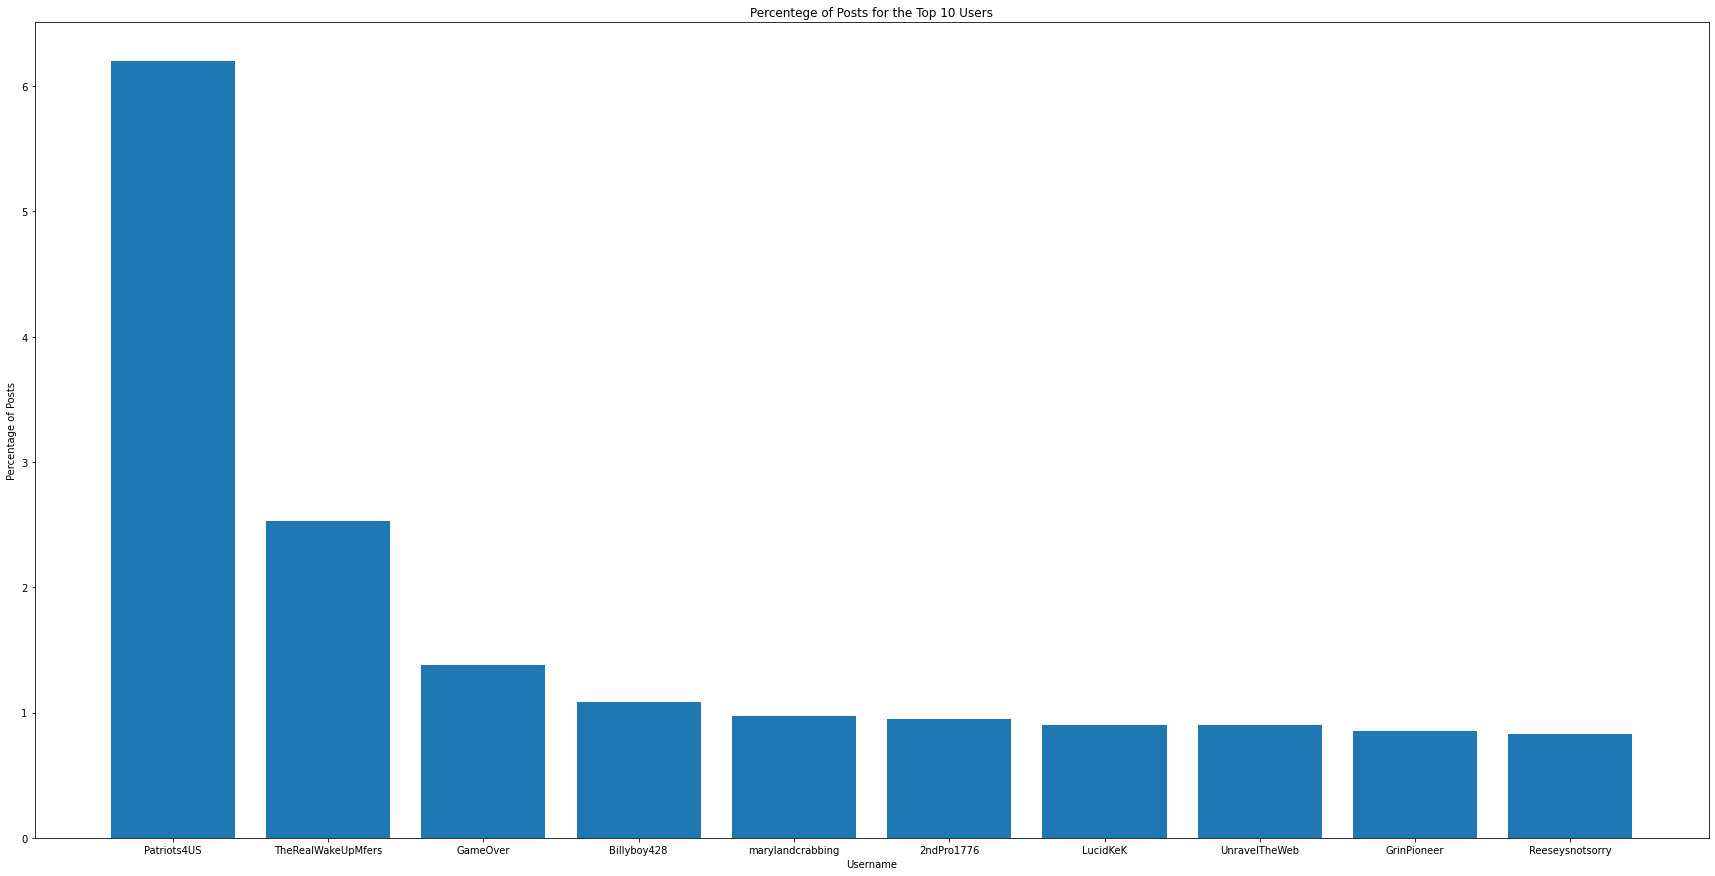

In [16]:
plt.figure(figsize=(30,15))
plt.bar(qATable.Username,qATable.Percentage)
plt.xlabel('Username')
plt.ylabel('Percentage of Posts')
plt.title('Percentege of Posts for the Top 10 Users')
plt.show
ansA=str((sum/totalPosts)*100)
ansA
print('Percentage of posts for the cumulalative top 10 users is '+ansA)

b)

red = human and verified
green = human and not verified
yellow = not human and not verified
blue = not human and verified


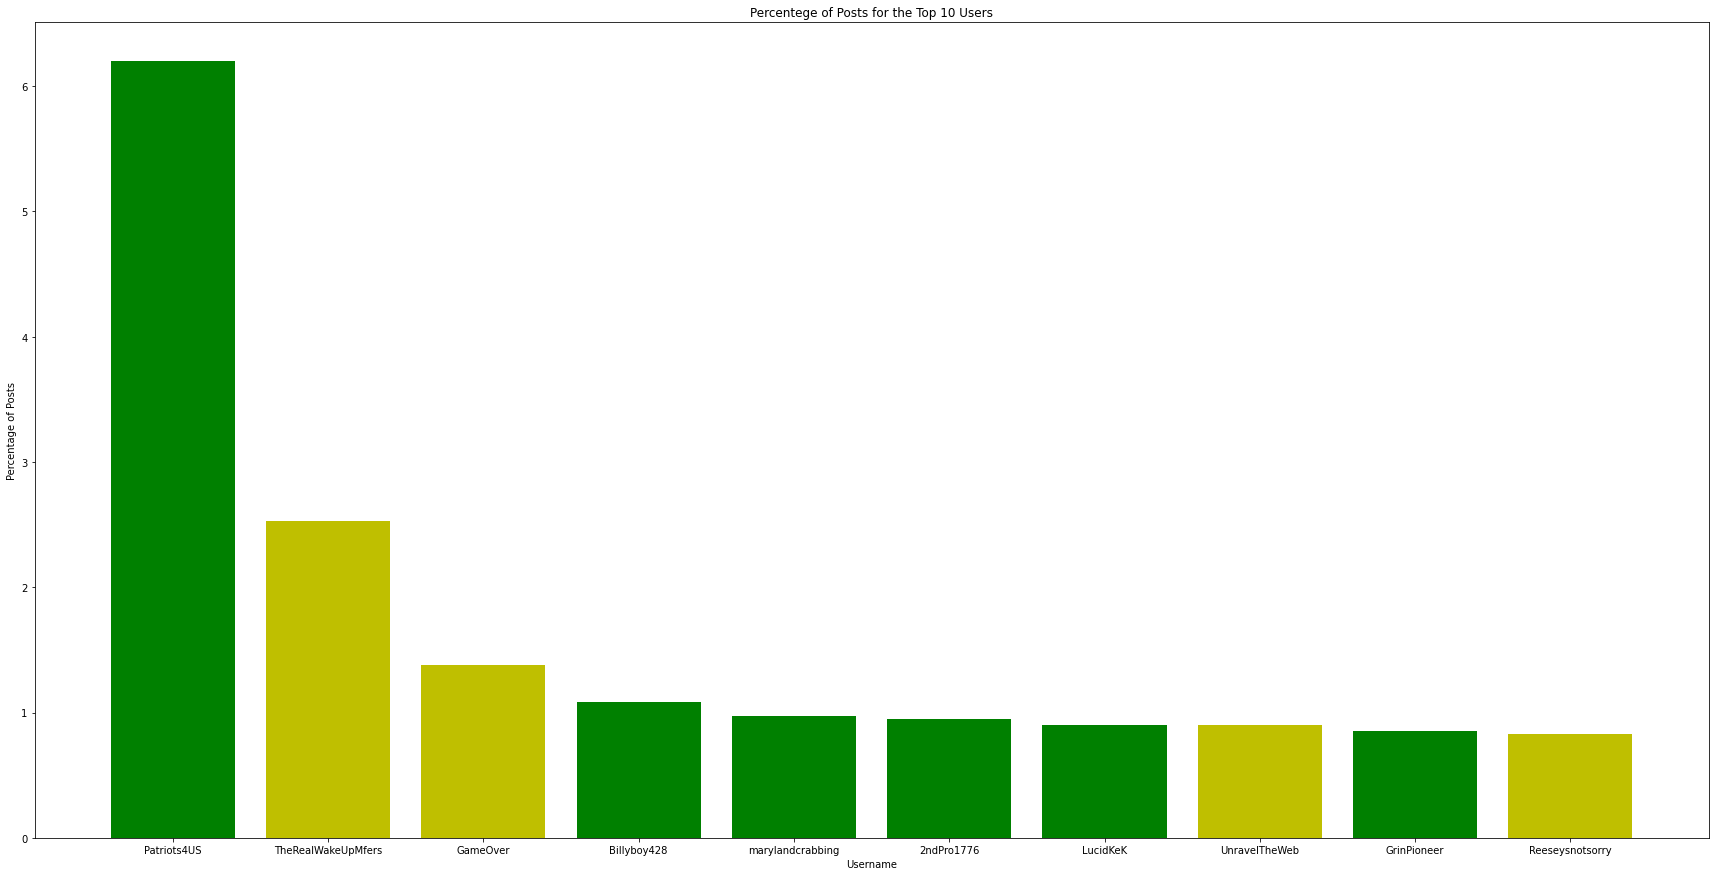

In [17]:
colourArr=[]
for i in range(len(qATable)):
  if (qATable.Human[i] and qATable.Verified[i]):
    colourArr.append('r')
  elif (qATable.Human[i] and (qATable.Verified[i]==False)):
    colourArr.append('g')
  elif (qATable.Human[i]==False and qATable.Verified[i]==False):
    colourArr.append('y')
  else:
    colourArr.append('b')
plt.figure(figsize=(30,15))
plt.bar(qATable.Username,qATable.Percentage,color=colourArr)
plt.xlabel('Username')
plt.ylabel('Percentage of Posts')
plt.title('Percentege of Posts for the Top 10 Users')
plt.show
print('red = human and verified')
print('green = human and not verified')
print('yellow = not human and not verified')
print('blue = not human and verified')


**Question 2**

a)

i)

red = human and verified
green = human and not verified
yellow = not human and not verified
blue = not human and verified


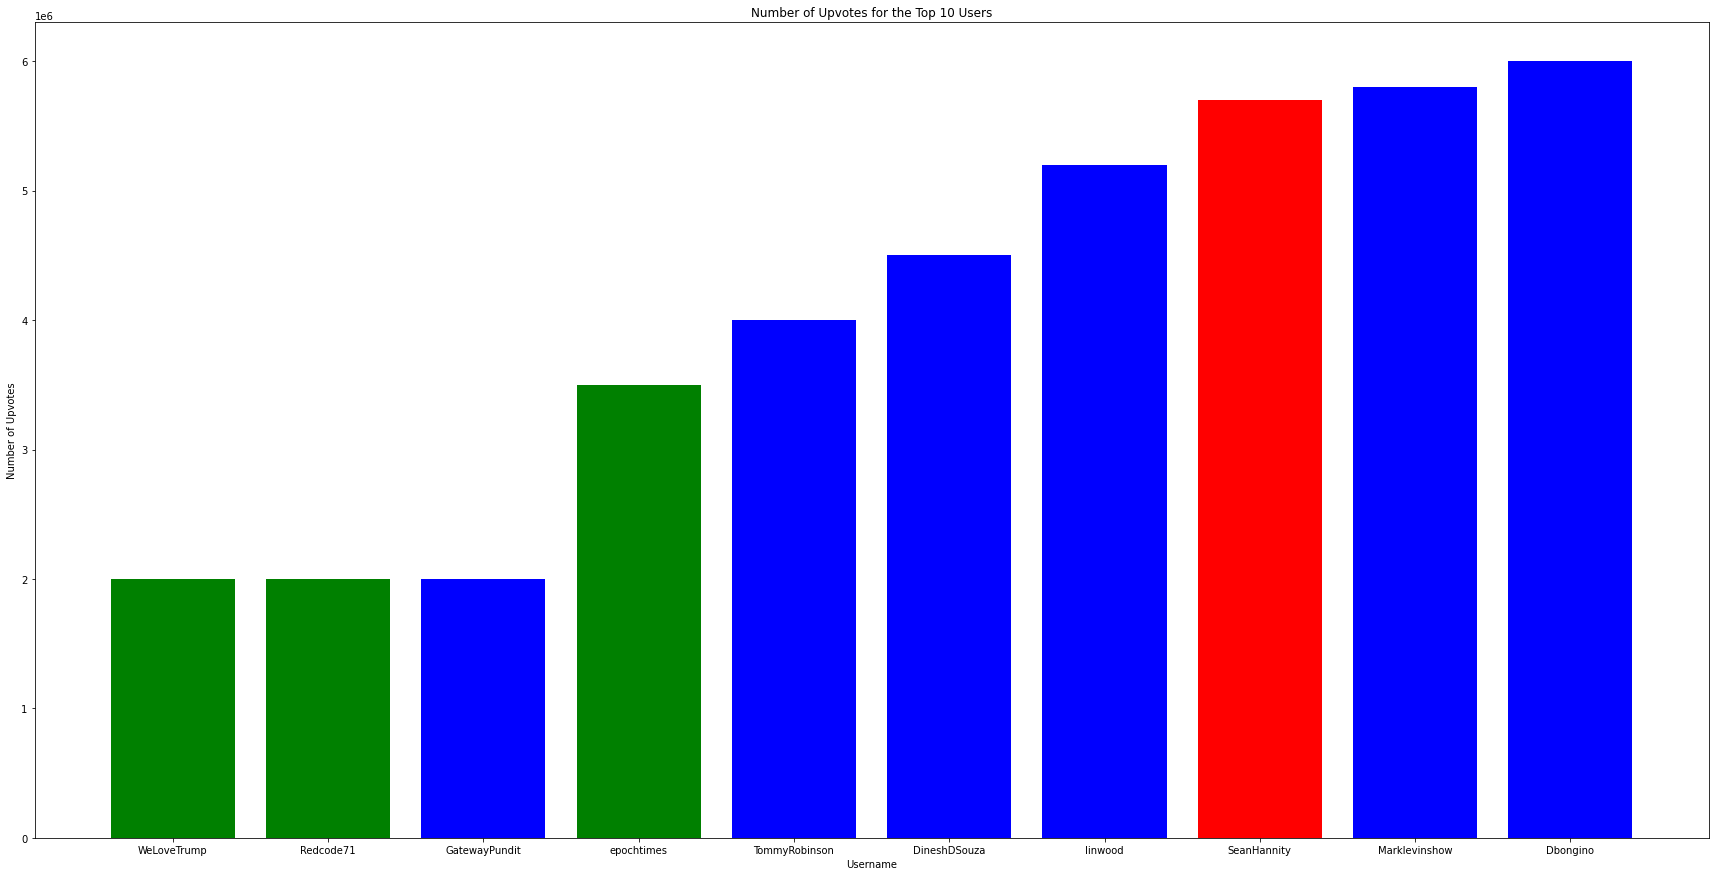

In [18]:
numUpvotes=userData.sort_values(by='Score')[len(userData)-10:len(userData)]
numUpvotes=pd.DataFrame(numUpvotes)
numUpvotes
colourArr=[]
for i in numUpvotes.index:
  if (numUpvotes.Human[i] and numUpvotes.Verified[i]):
    colourArr.append('r')
  elif (numUpvotes.Human[i] and (numUpvotes.Verified[i]==False)):
    colourArr.append('g')
  elif (numUpvotes.Human[i]==False and numUpvotes.Verified[i]==False):
    colourArr.append('y')
  else:
    colourArr.append('b')
plt.figure(figsize=(30,15))
plt.bar(numUpvotes.Username,numUpvotes.Score,color=colourArr)
plt.xlabel('Username')
plt.ylabel('Number of Upvotes')
plt.title('Number of Upvotes for the Top 10 Users')
plt.show
print('red = human and verified')
print('green = human and not verified')
print('yellow = not human and not verified')
print('blue = not human and verified')


ii)

red = human and verified
green = human and not verified
yellow = not human and not verified
blue = not human and verified


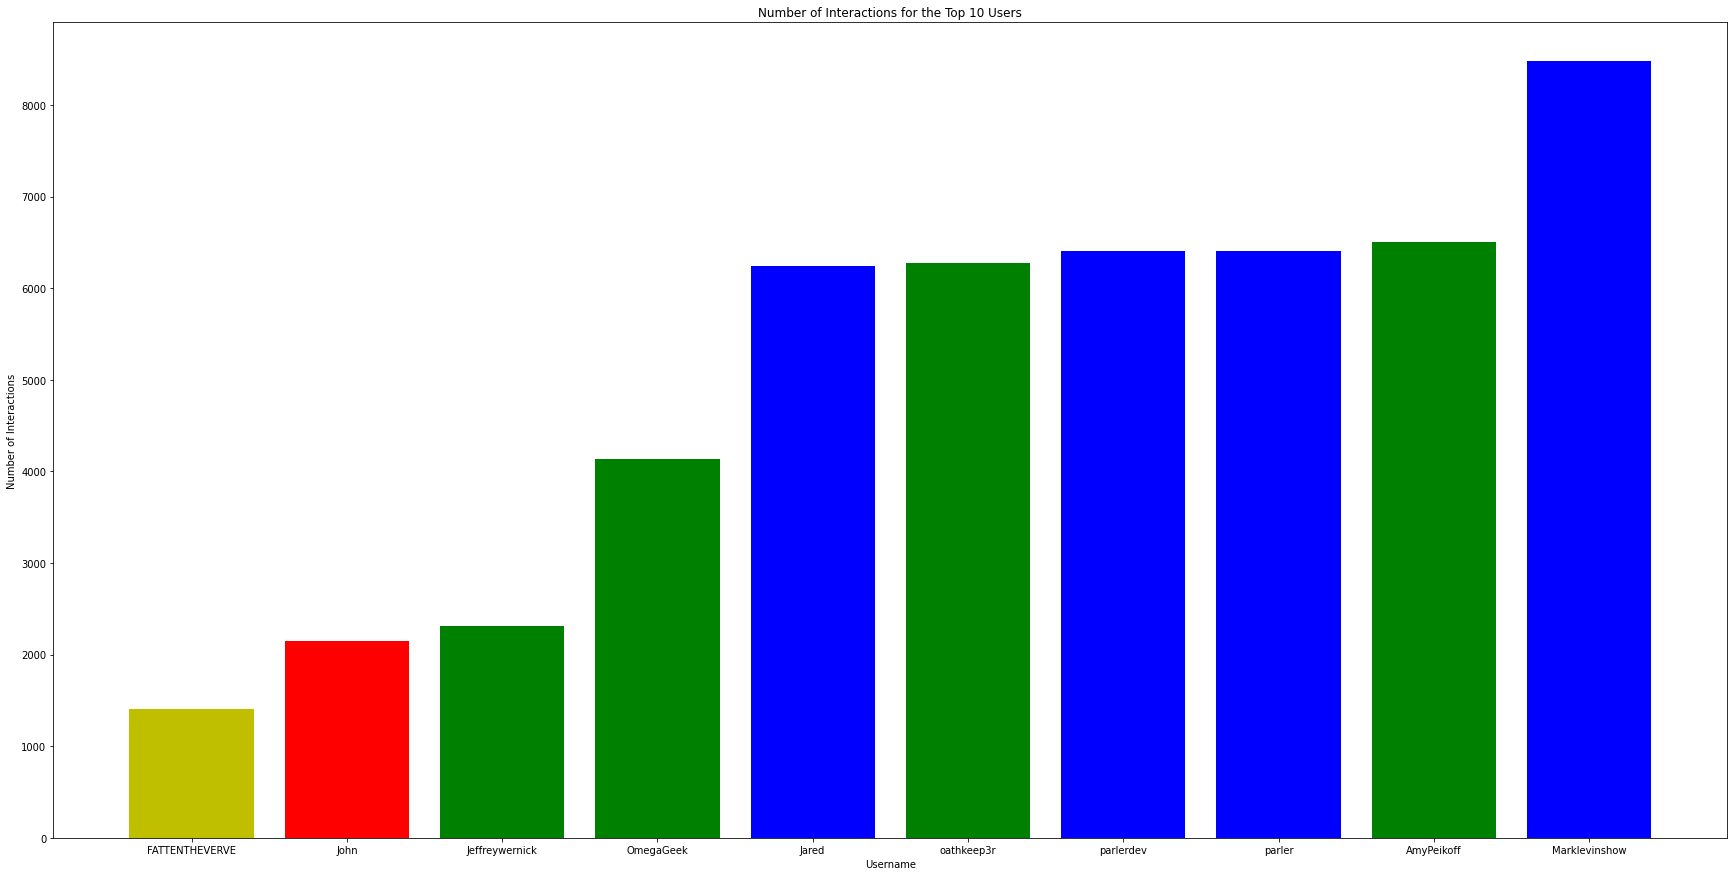

In [19]:
numInteractions=userData.sort_values(by='Interactions')[len(userData)-10:len(userData)]
numInteractions=pd.DataFrame(numInteractions)
numInteractions
colourArr=[]
for i in numInteractions.index:
  if (numInteractions.Human[i] and numInteractions.Verified[i]):
    colourArr.append('r')
  elif (numInteractions.Human[i] and (numInteractions.Verified[i]==False)):
    colourArr.append('g')
  elif (numInteractions.Human[i]==False and numInteractions.Verified[i]==False):
    colourArr.append('y')
  else:
    colourArr.append('b')
plt.figure(figsize=(30,15))
plt.bar(numInteractions.Username,numInteractions.Interactions,color=colourArr)
plt.xlabel('Username')
plt.ylabel('Number of Interactions')
plt.title('Number of Interactions for the Top 10 Users')
plt.show
print('red = human and verified')
print('green = human and not verified')
print('yellow = not human and not verified')
print('blue = not human and verified')

iii)

In [20]:
mentions={}
for i in range(len(postsData)):
  if len(postsData.At[i])>2:
    dict=eval(postsData.At[i])
    for j in dict.values():
      if j in mentions.keys():
        mentions[j]+=1
      else:
        mentions[j]=1
mentions

{'8ca4e06199b8475ea18cc15a4fbef2ae': 405,
 '310f7705eb27b5f33faeff3c14ac88da': 564,
 '220a66391cf34890b14efcf73771516d': 445,
 '167df95946cb42bfa06afe136cb8eb28': 1130,
 '58dd83233c6ad6428f108be37cd5ba12': 13,
 '77f47f5e1078b777c80109c02d34dcc3': 1,
 'fa0a1ac3767e4edb855f069bf48d7a88': 7,
 '185147e1d8c00856cab0c4258c13e0dd': 15,
 'f0a6181ff474e3b99426b8a69bc93875': 2,
 '7f2d141f70bf4f94ac58cb440540a92f': 2,
 '7817a65d00614ae0afb606ed0b969047': 202,
 '58dd83233c6ad6428f108be37c89bb35': 2,
 '4b8638eca2db4b17b3a7203e40ac8ce7': 2185,
 'fe23948cd81123aeed2394d6d49a8857': 1,
 '3ad34be0b90f4841ad85cc8e9f3388b2': 4,
 'd487d08a12e24a8eac1ec290e972ed8e': 1,
 'eaf17a81ef324be50808e176179027c3': 1,
 '9d1a1ea382a84bef88b4164312f62f06': 2,
 'ae1e9caa93344e73bf2e4e76f3b3db7b': 1,
 '56f8f66329cd46b88666a4cb2a00a6fa': 1,
 'a078092e6e2df507bfd12db4710e3290': 122,
 '46ca3fc426ec42d0b39c0efa6ca14e7c': 32,
 '9f3a9deebdd3444385ef588d5807e916': 2,
 'aa85d8881b794fd2b44ea0e61bc4ff34': 335,
 '10f6e32031464d7b9

red = human and verified
green = human and not verified
yellow = not human and not verified
blue = not human and verified


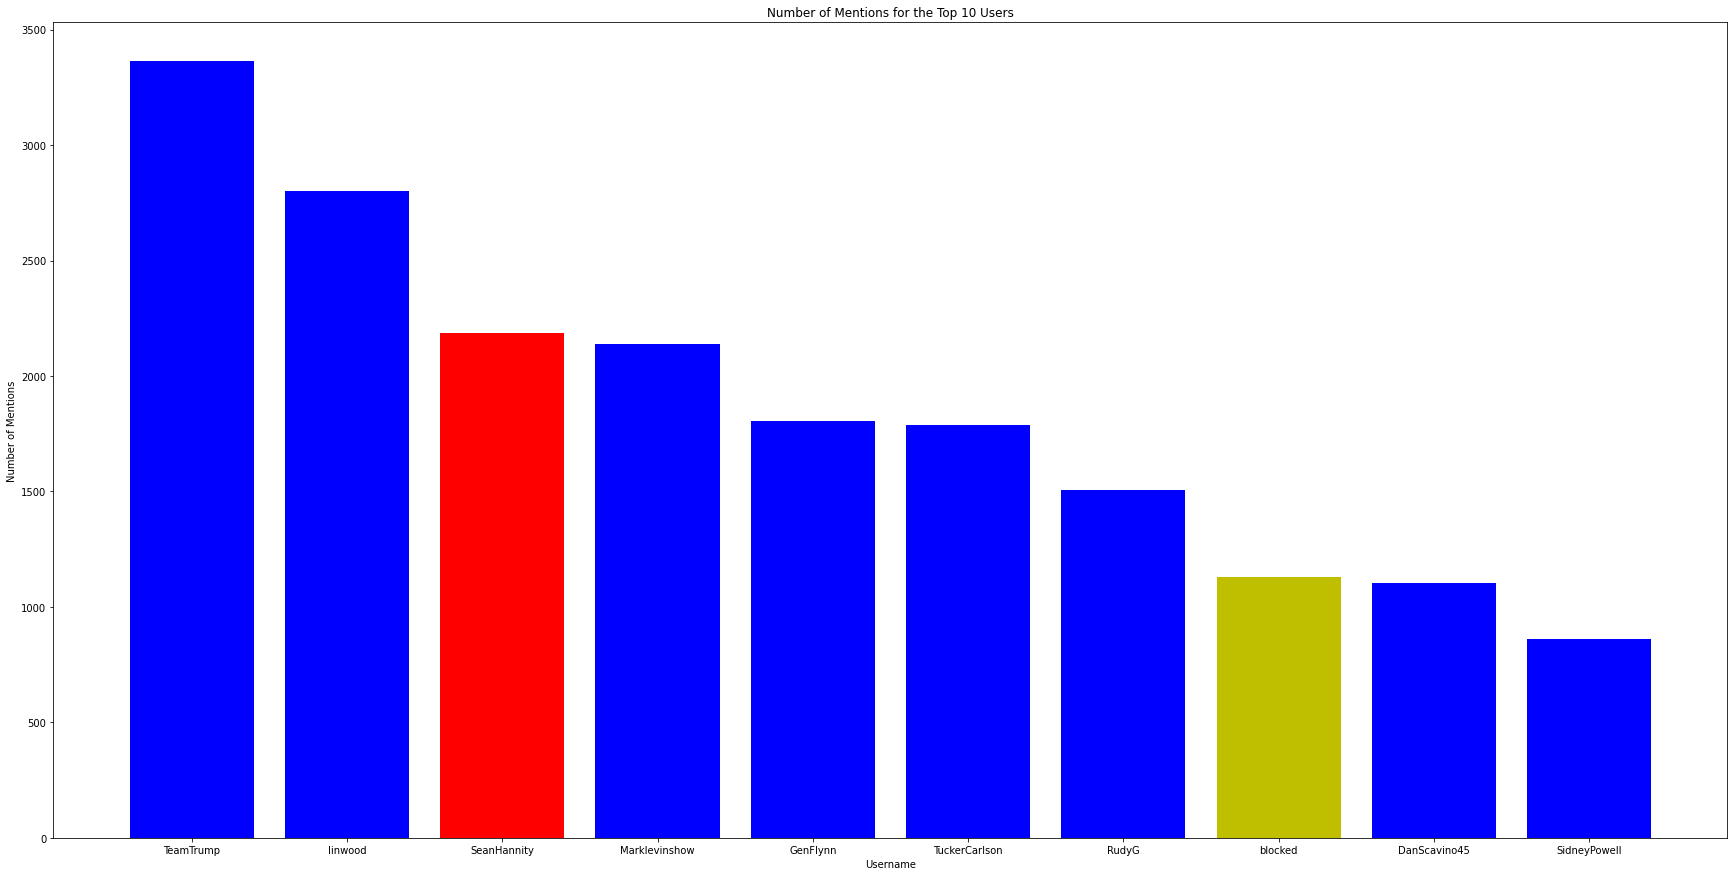

In [21]:
tryMentions = sorted(mentions.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryMentions)):
  keys.append(tryMentions[i][0])
  values.append(tryMentions[i][1])
relevantData
tryMentions=relevantData.loc[keys]
tryMentions['Mentions']=values
tryMentions
colourArr=[]
for i in tryMentions.index:
  if (tryMentions.Human[i] and tryMentions.Verified[i]):
    colourArr.append('r')
  elif (tryMentions.Human[i] and (tryMentions.Verified[i]==False)):
    colourArr.append('g')
  elif (tryMentions.Human[i]==False and tryMentions.Verified[i]==False):
    colourArr.append('y')
  else:
    colourArr.append('b')
plt.figure(figsize=(30,15))
plt.bar(tryMentions.Username,tryMentions.Mentions,color=colourArr)
plt.xlabel('Username')
plt.ylabel('Number of Mentions')
plt.title('Number of Mentions for the Top 10 Users')
plt.show
print('red = human and verified')
print('green = human and not verified')
print('yellow = not human and not verified')
print('blue = not human and verified')




b)

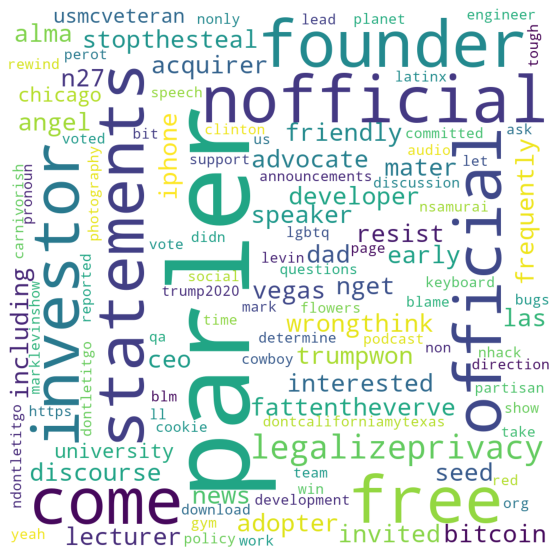

In [22]:
word=''
for i in numInteractions.Bio:
  i=str(i)
  tempArr=i.split()
  for j in range(len(tempArr)):
    tempArr[j]=tempArr[j].lower()
  word+=' '.join(tempArr)+' '
cloud=WordCloud(width=1000,height=1000,background_color='white').generate(word)
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()


**Question 3**

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np

def removePunctuation(string):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for x in string:
    if x in punctuations:
      string = string.replace(x, "")
  return string

ps=PorterStemmer()
lem = WordNetLemmatizer()
def takeInput(text):
  newText=(removePunctuation(text.lower()))
    # word tokenization
  lst=nltk.word_tokenize(text)
  temp1=[]
    # removing stopwords
  for w in lst:
    if (w not in set(stopwords.words("english"))):
      temp1.append(w)
  return temp1;


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
bigWord=''
for i in postsData.Body:
  i=str(i)
  bigWord+=' '+i.lower()
bigList=bigWord.split()
hashList=[]
wordList=[]
for i in bigList:
  if (i[0]=='#'):
    hashList.append(i)
  else:
    wordList.append(i)
hashList
wordList


['jack',
 'ma',
 'disappeared',
 'since',
 'novemb',
 'after',
 'criticizing',
 'xi',
 'jinping',
 'and',
 'china\\n\\nthen',
 'people',
 'started',
 'to',
 'ask',
 'questions...',
 'and',
 'all',
 'the',
 'sudden',
 'the',
 'mainstream',
 'media',
 'start',
 'to',
 'report',
 'that',
 'he',
 'is',
 'fine.\\n\\nmy',
 'man',
 'is',
 'probably',
 'dead',
 'and',
 'became',
 'dog',
 'food\\n\\nnext',
 'month',
 'they',
 'report',
 'that',
 'he',
 'had',
 'a',
 'heart',
 'attack\\n#qanon',
 'the',
 'lady',
 'that',
 'died',
 'was',
 'not',
 'shot',
 'by',
 'police',
 '-',
 'who',
 'is',
 'this',
 'man???',
 'somebody',
 'knows\\n#maga2020',
 'arrest',
 'traitors\\n#maga2020',
 'hope',
 'this',
 'is',
 'true',
 '-',
 "can't",
 'confirm\\n',
 '\\n#maga2020',
 'antifa',
 'acting',
 'as',
 'trump',
 'supporters',
 'these',
 'guys',
 'are',
 'known',
 '-false',
 'flag',
 'attack\\n#maga2020',
 'false',
 'flag',
 'antifa',
 'attack',
 'capitol\\n#maga2020',
 'antifa',
 'inside',
 'capitol',
 "'b

In [25]:
hashes={}
# while (i<len(hashList)):
#   temp=hashList[i].split('\\n')
#   if (len(temp)>1):
#     hashList.pop(i)
#     for j in temp:
#       hashList.append(j)
#   i+=1

for i in hashList:
  if i in hashes.keys():
    hashes[i]+=1
  else:
    hashes[i]=1

hashes

{'#ingodwetrust': 2464,
 '#censorship': 18825,
 '#webuildthewall': 113,
 '#jexodus': 110,
 '#notleaving': 7430,
 '#recount': 4683,
 '#dominion': 20496,
 '#fraud': 9042,
 '#trump': 40826,
 '#maga': 49392,
 '#freedom': 20193,
 '#voterfraud': 34402,
 '#electionfraud': 25577,
 '#election2020': 26253,
 '#stopthesteal': 61100,
 '#elections': 1478,
 '#covid': 8379,
 '#china': 15844,
 '#presidenttrump': 11990,
 '#fakenews': 21304,
 '#fightback': 20135,
 '#resist': 6321,
 '#coronavirus': 9288,
 '#kraken': 7951,
 '#2a': 10378,
 '#americafirst': 18124,
 '#keepfighting': 1073,
 '#treason': 11866,
 '#trumpsupporters': 7342,
 '#fearless45': 209,
 '#digitalsoldiers': 7174,
 '#kag2020': 14818,
 '#patriots': 22321,
 '#holdtheline': 11496,
 '#america': 13207,
 '#saveourchildren': 7766,
 '#3percenter': 57,
 '#godblessamerica': 6751,
 '#conservative': 14732,
 '#alllivesmatter': 5051,
 '#keepamericagreat': 11066,
 '#bidencrimefamily': 11605,
 '#deepstate': 16604,
 '#election': 14870,
 '#qarmy': 7625,
 '#do

b)i)

<function matplotlib.pyplot.show>

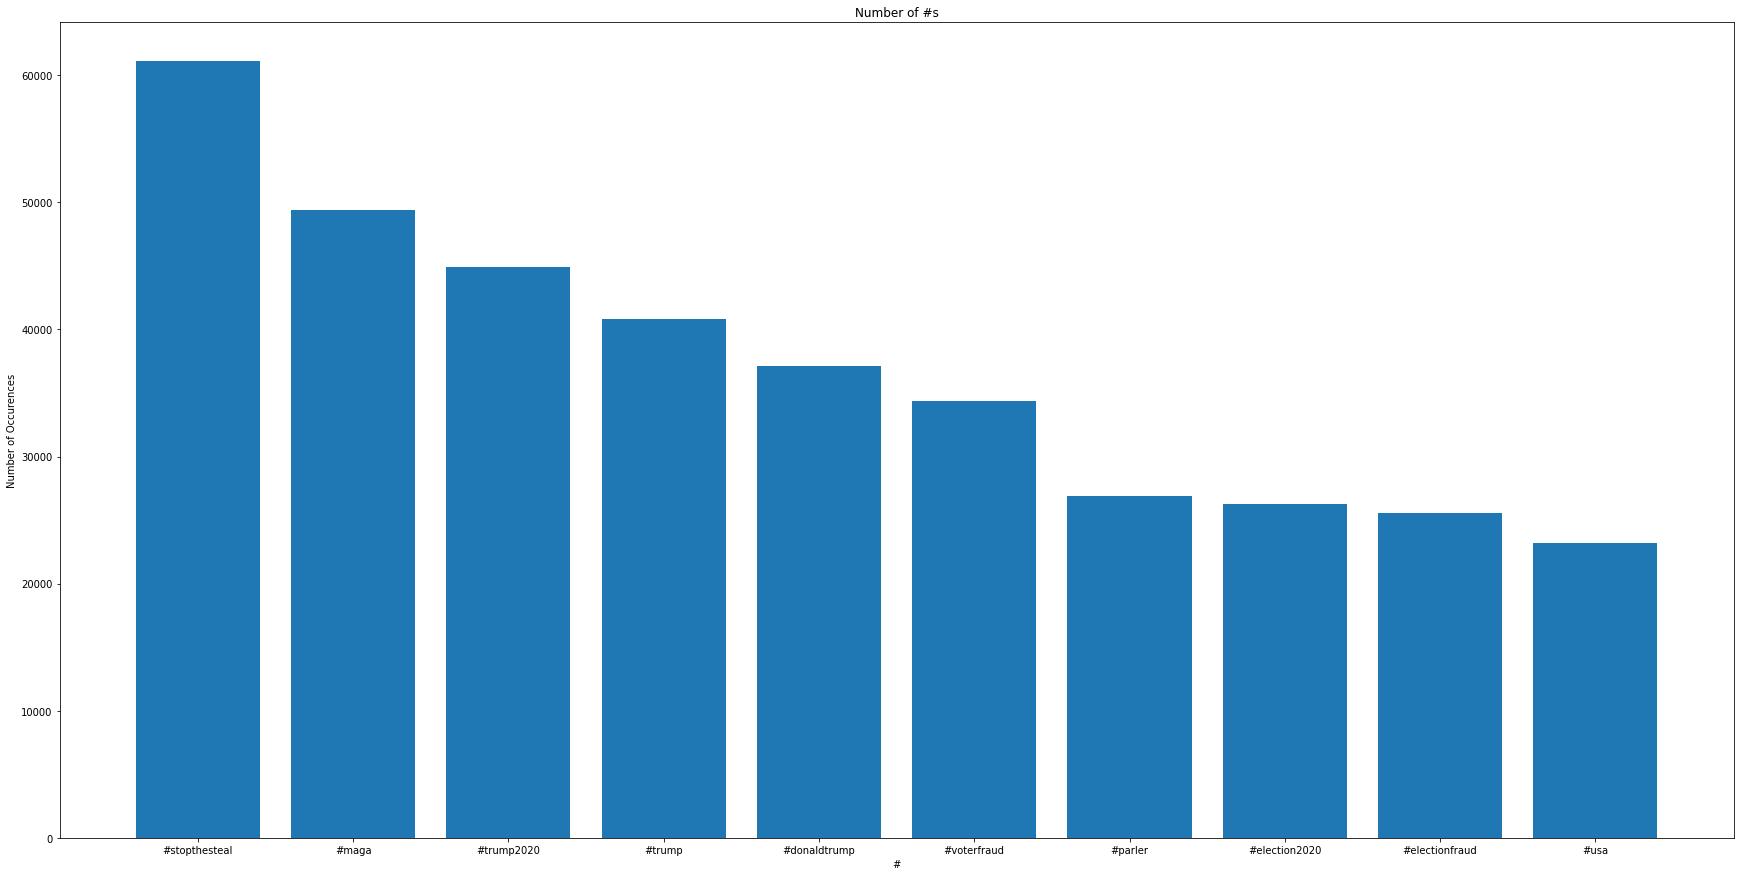

In [26]:
tryHashes = sorted(hashes.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashes)):
  keys.append(tryHashes[i][0])
  values.append(tryHashes[i][1])
plt.figure(figsize=(30,15))
plt.bar(keys,values)
plt.xlabel('#')
plt.ylabel('Number of Occurences')
plt.title('Number of #s')
plt.show

In [27]:
from collections import Counter
var=0
finalWordList=[]
stopWords=set(stopwords.words("english"))
stopWords.add('n')
stopWords.add('')
wordList
for i in range(len(wordList)):
  wordList[i]=removePunctuation(wordList[i].lower())
wordList



['jack',
 'ma',
 'disappeared',
 'since',
 'novemb',
 'after',
 'criticizing',
 'xi',
 'jinping',
 'and',
 'chinannthen',
 'people',
 'started',
 'to',
 'ask',
 'questions',
 'and',
 'all',
 'the',
 'sudden',
 'the',
 'mainstream',
 'media',
 'start',
 'to',
 'report',
 'that',
 'he',
 'is',
 'finennmy',
 'man',
 'is',
 'probably',
 'dead',
 'and',
 'became',
 'dog',
 'foodnnnext',
 'month',
 'they',
 'report',
 'that',
 'he',
 'had',
 'a',
 'heart',
 'attacknqanon',
 'the',
 'lady',
 'that',
 'died',
 'was',
 'not',
 'shot',
 'by',
 'police',
 '',
 'who',
 'is',
 'this',
 'man',
 'somebody',
 'knowsnmaga2020',
 'arrest',
 'traitorsnmaga2020',
 'hope',
 'this',
 'is',
 'true',
 '',
 'cant',
 'confirmn',
 'nmaga2020',
 'antifa',
 'acting',
 'as',
 'trump',
 'supporters',
 'these',
 'guys',
 'are',
 'known',
 'false',
 'flag',
 'attacknmaga2020',
 'false',
 'flag',
 'antifa',
 'attack',
 'capitolnmaga2020',
 'antifa',
 'inside',
 'capitol',
 'badgenmaga2020',
 'pres',
 'in',
 'texasnmaga

In [28]:
wordList=[i for i in wordList if i not in stopWords]
wordList

['jack',
 'disappeared',
 'since',
 'novemb',
 'criticizing',
 'xi',
 'jinping',
 'chinannthen',
 'people',
 'started',
 'ask',
 'questions',
 'sudden',
 'mainstream',
 'media',
 'start',
 'report',
 'finennmy',
 'man',
 'probably',
 'dead',
 'became',
 'dog',
 'foodnnnext',
 'month',
 'report',
 'heart',
 'attacknqanon',
 'lady',
 'died',
 'shot',
 'police',
 'man',
 'somebody',
 'knowsnmaga2020',
 'arrest',
 'traitorsnmaga2020',
 'hope',
 'true',
 'cant',
 'confirmn',
 'nmaga2020',
 'antifa',
 'acting',
 'trump',
 'supporters',
 'guys',
 'known',
 'false',
 'flag',
 'attacknmaga2020',
 'false',
 'flag',
 'antifa',
 'attack',
 'capitolnmaga2020',
 'antifa',
 'inside',
 'capitol',
 'badgenmaga2020',
 'pres',
 'texasnmaga2020',
 'blmnmaga2020',
 'antifanmaga2020',
 'capitol',
 'break',
 'suspect',
 'antifa',
 'dressed',
 'capitol',
 'arrest',
 'false',
 'flag',
 'capitolnmaga2020',
 'scotus',
 'cowards',
 'revolution',
 'point',
 'sens',
 'steve',
 'daines',
 'montana',
 'mike',
 'braun

a) i)

<function matplotlib.pyplot.show>

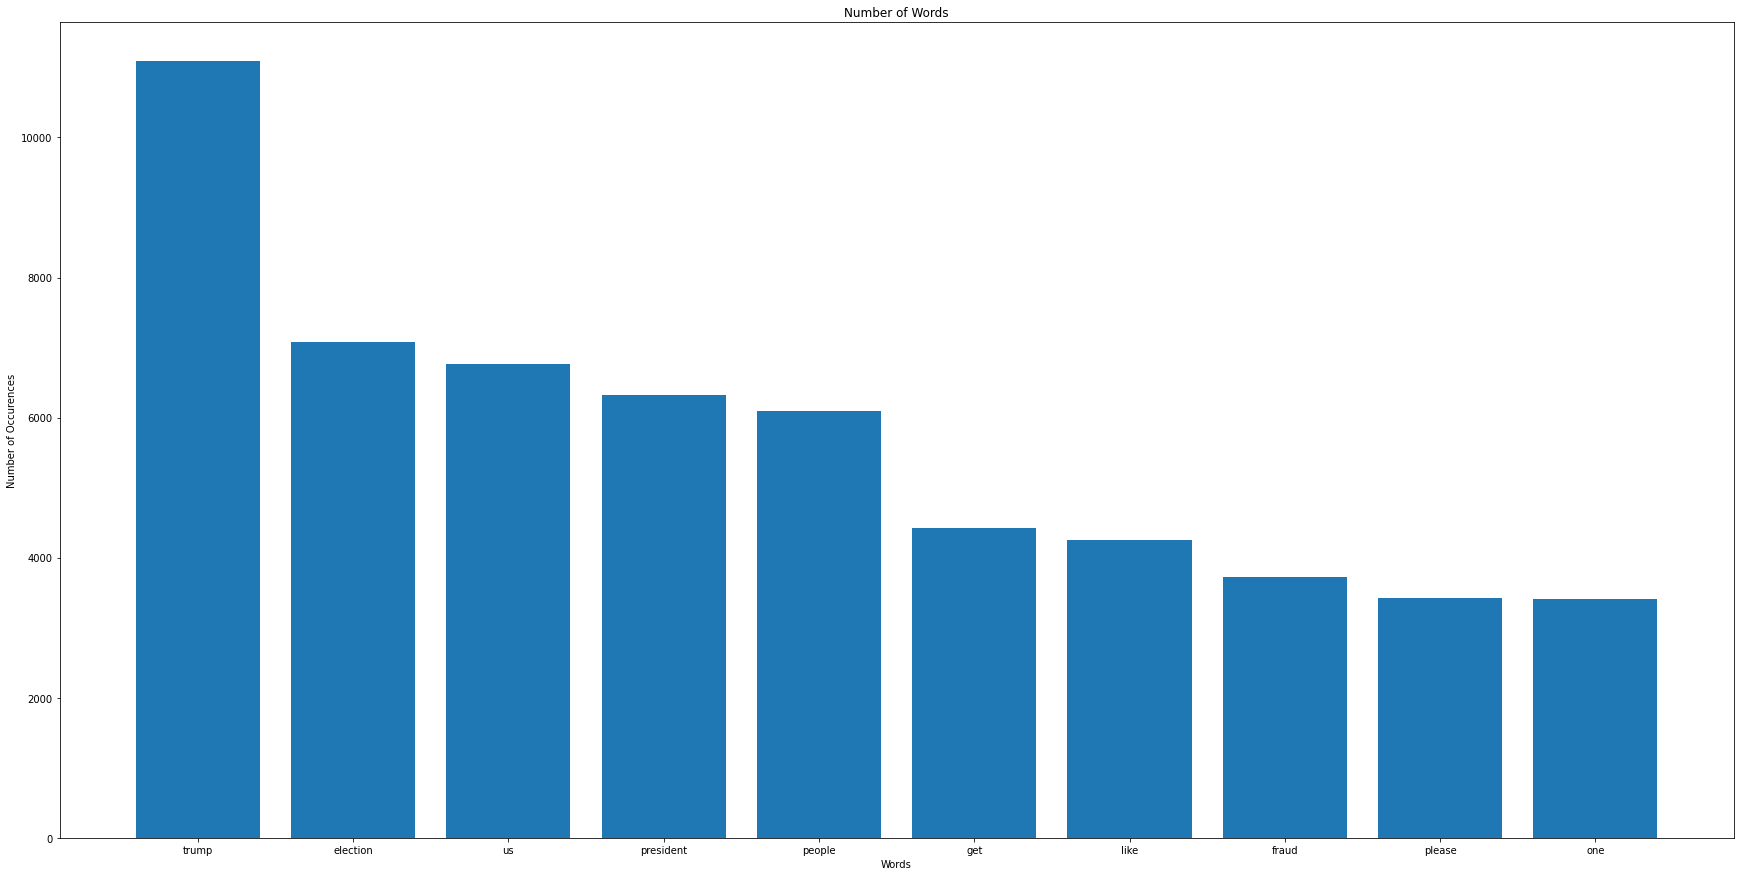

In [29]:
finalWords={}

for i in wordList:
  if i in finalWords.keys():
    finalWords[i]+=1
  else:
    finalWords[i]=1
tryWords = sorted(finalWords.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryWords)):
  keys.append(tryWords[i][0])
  values.append(tryWords[i][1])
plt.figure(figsize=(30,15))
plt.bar(keys,values)
plt.xlabel('Words')
plt.ylabel('Number of Occurences')
plt.title('Number of Words')
plt.show

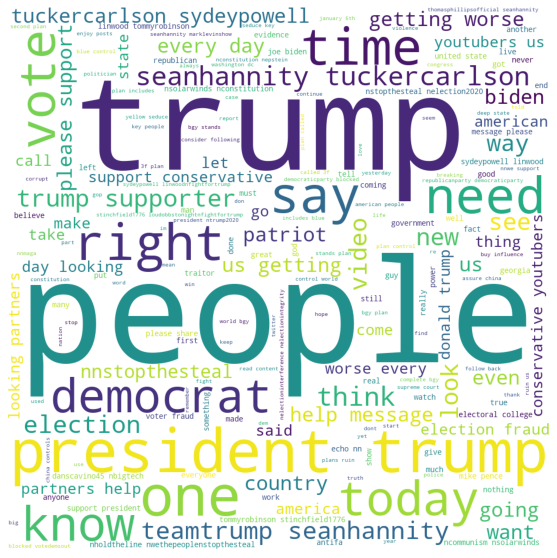

In [30]:
word3=''
for i in wordList: 
  i = str(i)
  word3 += i+" "
cloud3=WordCloud(width=1000,height=1000,background_color='white').generate(word3)
plt.figure(figsize=(10,10))
plt.imshow(cloud3)
plt.axis("off")
plt.show()

In [31]:
hashDict={}
for i in postsData.Body:
  i=str(i)
  splitVar=i.split()
  hashCounter=0
  for j in splitVar:
    if (j[0]=='#'):
      hashCounter+=len(j)
  for j in splitVar:
    if (j[0]=='#'):
      if j in hashDict.keys():
        hashDict[j][0]+=1
        hashDict[j][1]+=(len(i)-hashCounter)
      else:
        tempArray=[]
        tempArray.append(1)
        tempArray.append(len(i)-hashCounter)
        hashDict[j]=tempArray

b) ii)

<function matplotlib.pyplot.show>

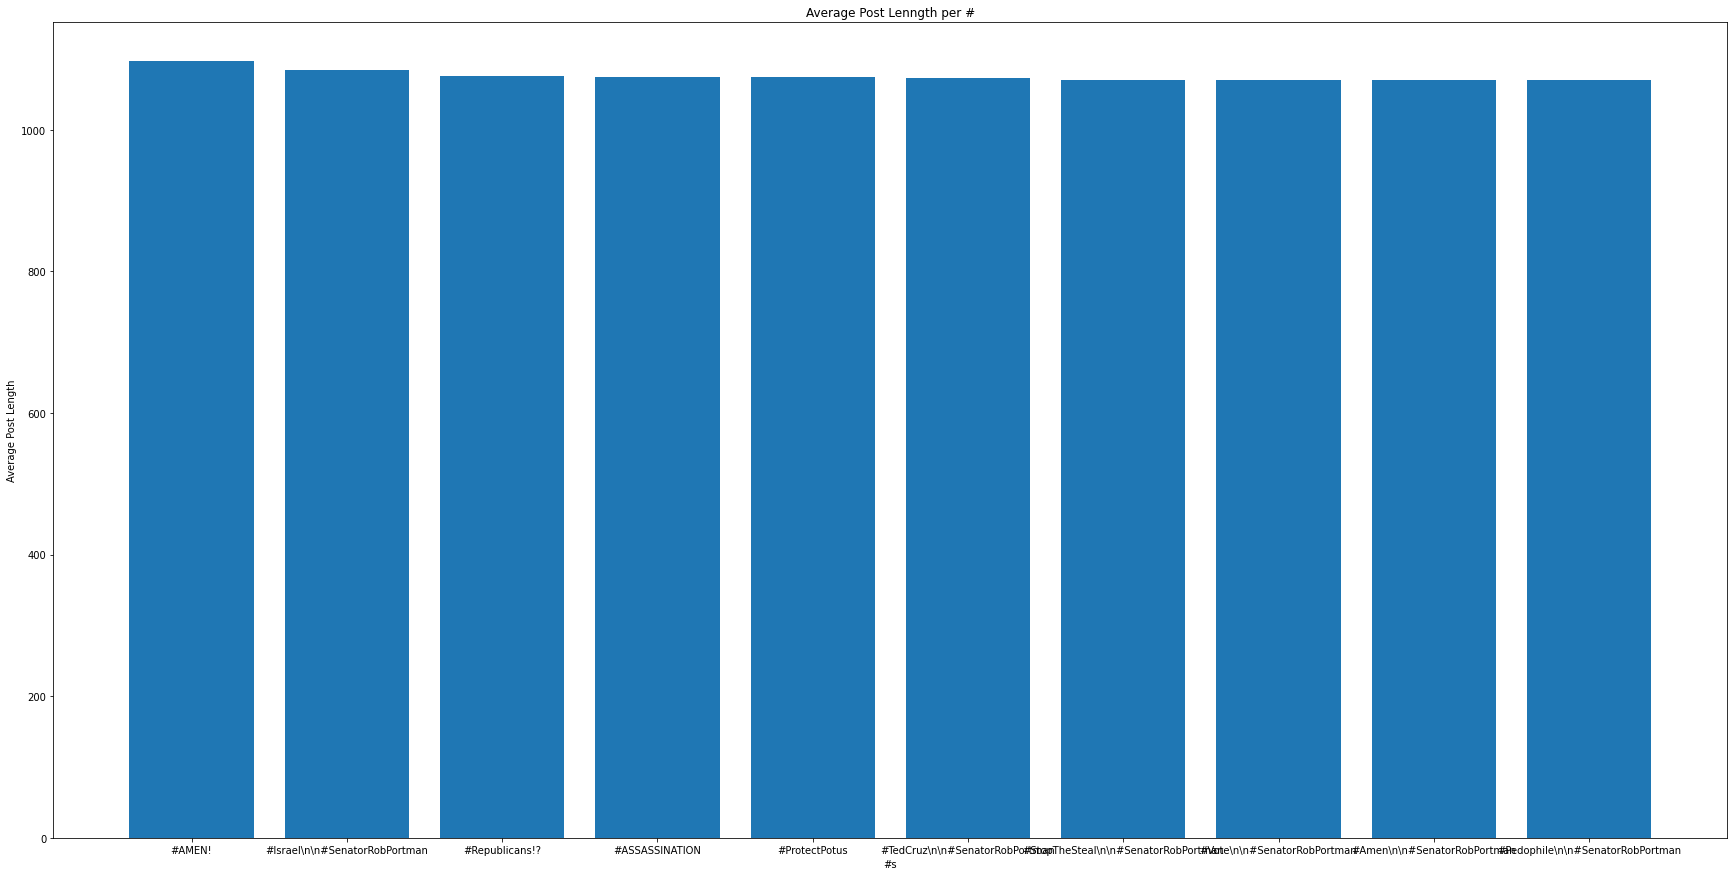

In [ ]:
finalHashDict={}
for key, value in hashDict.items():
  finalHashDict[key]=(value[1]/value[0])
finalHashDict
tryHashDict = sorted(finalHashDict.items(), key=lambda item: item[1], reverse=True)[:10]
keys=[]
values=[]
for i in range(len(tryHashDict)):
  keys.append(tryHashDict[i][0])
  values.append(tryHashDict[i][1])
plt.figure(figsize=(30,15))
plt.bar(keys,values)
plt.xlabel('#s')
plt.ylabel('Average Post Length')
plt.title('Average Post Lenngth per #')
plt.show

**Question 4**

a)

In [55]:
from tqdm.auto import tqdm
postsData['createdAtTime']= pd.to_datetime(postsData.CreatedAt, format='%Y%m%d%H%M%S')
# print(postsData.createdAtTime)
for i in tqdm(range(len(postsData))):
  postsData.loc[i,'createdAtTime']=postsData.loc[i,'createdAtTime'].replace(microsecond=0,second=0,minute=0,hour=0)

In [56]:
createdAtDF=postsData.groupby("createdAtTime").size().reset_index(name="count")

px.line(createdAtDF,x="createdAtTime",y="count")

b)

In [57]:
from tqdm.auto import tqdm
userData['createdAtTime']= pd.to_datetime(userData.Joined, format='%Y%m%d%H%M%S')
for i in tqdm(range(len(userData))):
  userData.loc[i,'createdAtTime']=userData.loc[i,'createdAtTime'].replace(microsecond=0,second=0,minute=0,hour=0)

In [58]:
createdAtDF=userData.groupby("createdAtTime").size().reset_index(name="count")

px.line(createdAtDF,x="createdAtTime",y="count")